# __Jano Use Case:__ 

------------------------

## Instance Jano

Instance Jano passing a defined pandas dataframe. This dataframe should contain all the information needed to iterate over time so make sure the time interval that the dataframe contains is enough for  Jano to make time splits.

In [17]:
from jano.jano import Jano
from datetime import datetime
import pandas as pd
import random

%matplotlib inline 

ImportError: No module named jano.jano

In [16]:
n = 10000
today = datetime.now()
dataframe = pd.DataFrame({'date':   [Jano.move(today, x) for x in range(n)],
                          'TARGET': [random.randrange(0, 50) for x in range(0, n)],
                   })
dataframe['date'] = pd.to_datetime(dataframe['date'])

df  = dataframe

NameError: name 'datetime' is not defined

In [17]:
jano = Jano(df, False)

### Define a mask
    
Jano uses the concept of Masks to define train and test splits.

Caso de uso walk_one:

In [19]:
jano = Jano(df, False)
jano.mask(train_days = 1, 
          gap = 1, 
          test_days = 1, 
          target = 'TARGET', 
          train_date_attrib = 'date', 
          test_date_attrib  = 'date')

#trydate = datetime(2019, 7, 19, 00, 00, 00)

X_train, X_test, y_train, y_test = jano.walk_one(begin=0,shift=0)

print('X_train_len: ', jano.X_train_len,
      'X_test_len: ',  jano.X_test_len,
      'y_train_len',   jano.y_train_len,
      'y_test_len',    jano.y_test_len)

X_train_len:  2 X_test_len:  2 y_train_len 2 y_test_len 2


__Caso de uso walk:__

In [21]:
jano = Jano(df, False)
jano.mask(train_days = 10, 
          gap = 1, 
          test_days = 1, 
          target = 'TARGET', 
          train_date_attrib = 'date', 
          test_date_attrib  = 'date')


data = {'iteration': [],
        'X_train_start_date': [],
        'X_train_end_date':[],
        'gap_days_start': [],
        'gap_end_date': [],
        'Test_start_date': [],
        'Test_end_date': [],
        'X_train_lenght': [],
        'X_test_lenght':  [],
        'y_train_lenght': [],
        'y_test_lenght':  [],
        'Q_train_days':     [],
        'Q_test_days':      [],
        'Q_gap_days':       [],
       }

for X_train, X_test, y_train, y_test in jano.walk(begin=1, iterations=25, shift=0):
        
    mask = jano.get_mask()

    data['X_train_start_date'].append(jano.train_start_date)
    data['X_train_end_date'].append(jano.test_end_date)
    data['gap_days_start'].append(jano.train_start_date)
    data['gap_end_date'].append(jano.train_start_date)
    data['Test_start_date'].append(jano.train_start_date)
    data['Test_end_date'].append(jano.test_end_date)
    
    data['iteration'].append(jano.iteration)
    data['X_train_lenght'].append(jano.X_train_len)
    data['X_test_lenght'].append(jano.X_test_len)
    data['y_train_lenght'].append(jano.X_train_len)
    data['y_test_lenght'].append(jano.X_test_len)
    data['Q_train_days'].append(mask['train_days'])
    data['Q_test_days'].append(mask['test_days'])
    data['Q_gap_days'].append(mask['gap'])

    

In [22]:
results = pd.DataFrame(data)

In [23]:
results[].sort_values('X_train_start_date', ascending=True)

,Q_gap_days,Q_test_days,Q_train_days,Test_end_date,Test_start_date,X_test_lenght,X_train_end_date,X_train_lenght,X_train_start_date,gap_days_start,gap_end_date,iteration,y_test_lenght,y_train_lenght
0,1,1,10,2020-03-22 17:12:16.900346,2020-03-10 17:12:16.900346,2,2020-03-22 17:12:16.900346,11,2020-03-10 17:12:16.900346,2020-03-10 17:12:16.900346,2020-03-10 17:12:16.900346,0,2,11
1,1,1,10,2020-03-23 17:12:16.900346,2020-03-11 17:12:16.900346,2,2020-03-23 17:12:16.900346,11,2020-03-11 17:12:16.900346,2020-03-11 17:12:16.900346,2020-03-11 17:12:16.900346,1,2,11
2,1,1,10,2020-03-24 17:12:16.900346,2020-03-12 17:12:16.900346,2,2020-03-24 17:12:16.900346,11,2020-03-12 17:12:16.900346,2020-03-12 17:12:16.900346,2020-03-12 17:12:16.900346,2,2,11
3,1,1,10,2020-03-25 17:12:16.900346,2020-03-13 17:12:16.900346,2,2020-03-25 17:12:16.900346,11,2020-03-13 17:12:16.900346,2020-03-13 17:12:16.900346,2020-03-13 17:12:16.900346,3,2,11
4,1,1,10,2020-03-26 17:12:16.900346,2020-03-14 17:12:16.900346,2,2020-03-26 17:12:16.900346,11,2020-03-14 17:12:16.900346,2020-03-14 17:12:16.900346,2020-03-14 17:12:16.900346,4,2,11
5,1,1,10,2020-03-27 17:12:16.900346,2020-03-15 17:12:16.900346,2,2020-03-27 17:12:16.900346,11,2020-03-15 17:12:16.900346,2020-03-15 17:12:16.900346,2020-03-15 17:12:16.900346,5,2,11
6,1,1,10,2020-03-28 17:12:16.900346,2020-03-16 17:12:16.900346,2,2020-03-28 17:12:16.900346,11,2020-03-16 17:12:16.900346,2020-03-16 17:12:16.900346,2020-03-16 17:12:16.900346,6,2,11
7,1,1,10,2020-03-29 17:12:16.900346,2020-03-17 17:12:16.900346,2,2020-03-29 17:12:16.900346,11,2020-03-17 17:12:16.900346,2020-03-17 17:12:16.900346,2020-03-17 17:12:16.900346,7,2,11
8,1,1,10,2020-03-30 17:12:16.900346,2020-03-18 17:12:16.900346,2,2020-03-30 17:12:16.900346,11,2020-03-18 17:12:16.900346,2020-03-18 17:12:16.900346,2020-03-18 17:12:16.900346,8,2,11
9,1,1,10,2020-03-31 17:12:16.900346,2020-03-19 17:12:16.900346,2,2020-03-31 17:12:16.900346,11,2020-03-19 17:12:16.900346,2020-03-19 17:12:16.900346,2020-03-19 17:12:16.900346,9,2,11


/home/marcos/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
/home/marcos/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
/home/marcos/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2.0, right=2.0
  'left=%s, right=%s') % (left, right))
/home/marcos/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=3.0, right=3.0
  'left=%s, 

iteration
0     AxesSubplot(0.125,0.125;0.775x0.755)
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
13    AxesSubplot(0.125,0.125;0.775x0.755)
14    AxesSubplot(0.125,0.125;0.775x0.755)
15    AxesSubplot(0.125,0.125;0.775x0.755)
16    AxesSubplot(0.125,0.125;0.775x0.755)
17    AxesSubplot(0.125,0.125;0.775x0.755)
18    AxesSubplot(0.125,0.125;0.775x0.755)
19    AxesSubplot(0.125,0.125;0.775x0.755)
20    AxesSubplot(0.125,0.125;0.775x0.755)
21    AxesSubplot(0.125,0.125;0.775x0.755)
22    AxesSubplot(0.125,0.125;0.775x0.755)
2

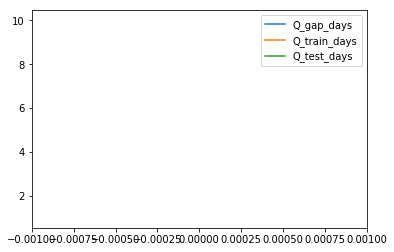

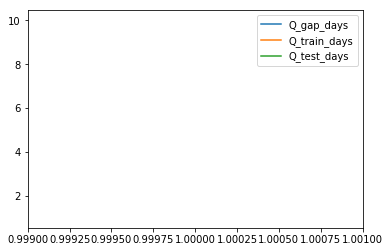

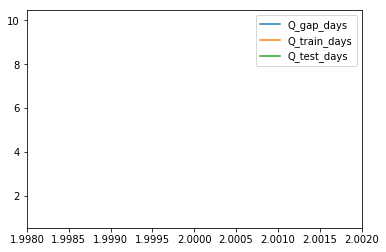

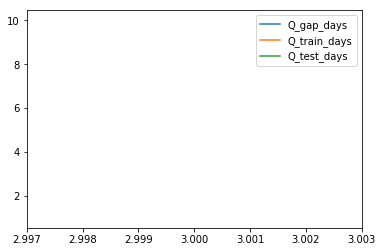

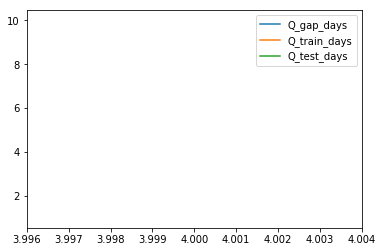

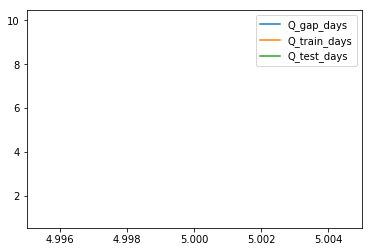

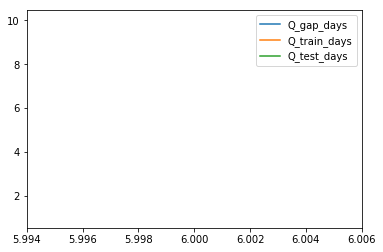

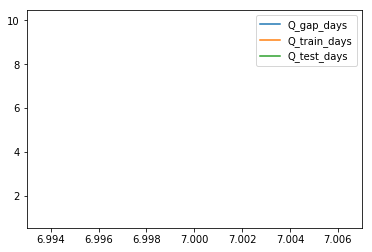

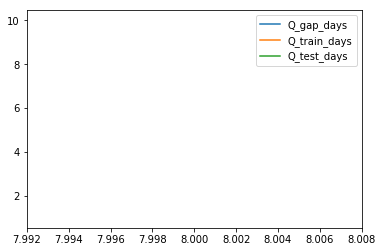

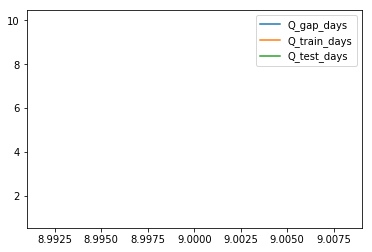

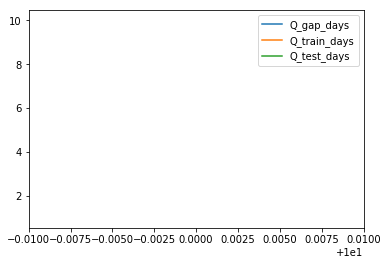

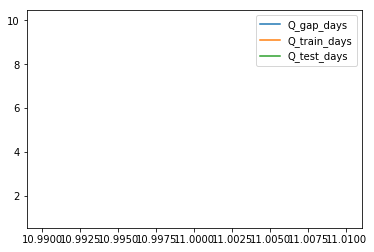

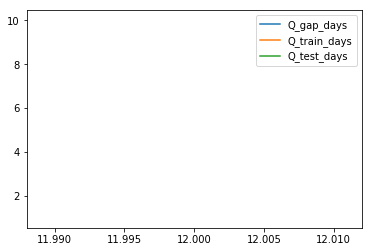

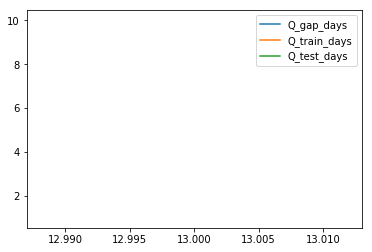

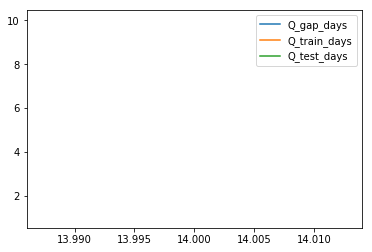

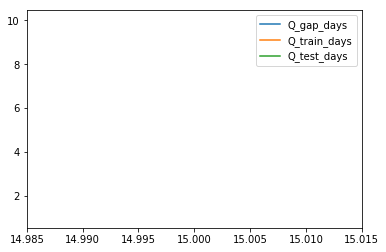

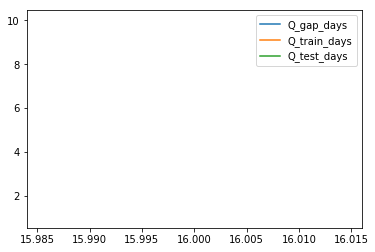

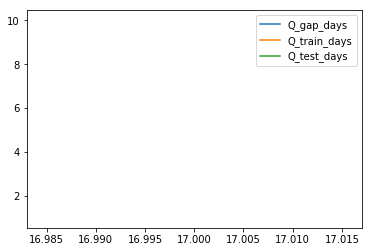

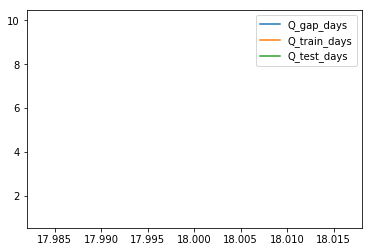

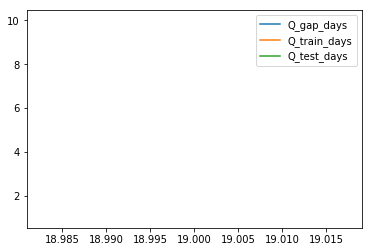

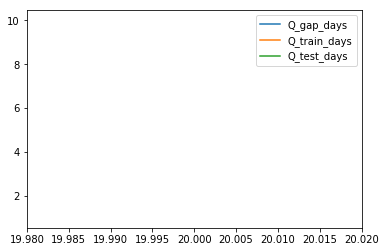

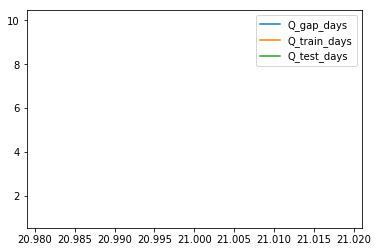

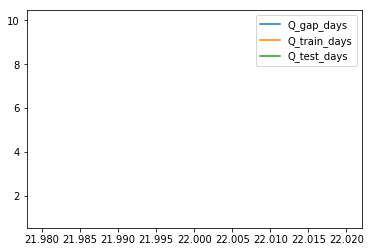

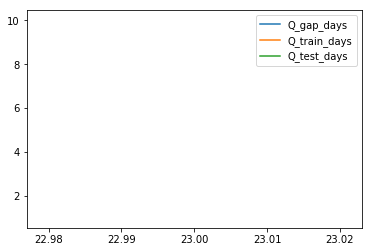

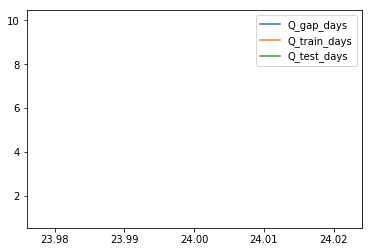

In [58]:
results.groupby('iteration')[['Q_gap_days', 'Q_train_days', 'Q_test_days']].plot()